In [1]:
import tensorflow as tf
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# downloading a pre-labeled image dataset from MNIST in the keras library
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# Preprocessing the images, scaling them to a value between 0 & 1
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

# Creating a sequential model, where each layer is added one after the other
model = tf.keras.models.Sequential()
# Flattens the input layer so that instead of being 2-dimensional 28 x 28, it becomes a 1D vector of length 784
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
# Addes a new dense layer (each node is connected to every single node of the previous layer) with 128 nodes
# Each node using the activation function ReLU which converts negative numebrs to 0, and leaves positive numbers as it
model.add(tf.keras.layers.Dense(128, activation='relu'))
# Creates an output layer of 10 nodes, corresponding to the prediction digits 0-9. Softmax picks the value with highest probability
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Configures the model with an optimizer, loss function, and metric to quantify model performance
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Fits the model with 3 epochs (runs through the entire training set 3 times, getting better every time)
model.fit(x_train, y_train, epochs=3)

model.save('handwritten.model')

Epoch 1/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3127 - accuracy: 0.9125
Epoch 2/3
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1439 - accuracy: 0.9572
Epoch 3/3
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0981 - accuracy: 0.9710


INFO:tensorflow:Assets written to: handwritten.model\assets


INFO:tensorflow:Assets written to: handwritten.model\assets


In [4]:
model = tf.keras.models.load_model('handwritten.model')

In [5]:
# Evaluates the model on the test data. Accuracy being the % of images where this model's prediction matches the pre-labeled solution in the keras dataset
loss, accuracy = model.evaluate(x_test, y_test)

print(loss)
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.1006 - accuracy: 0.9691
0.1005811095237732
0.9690999984741211


1/1 [==============================] - 0s 29ms/step
Digit Guess: 5


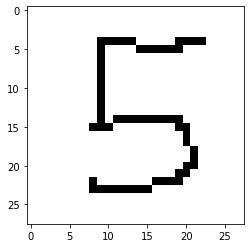

1/1 [==============================] - 0s 23ms/step
Digit Guess: 7


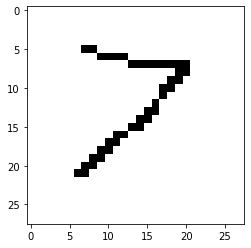

1/1 [==============================] - 0s 22ms/step
Digit Guess: 9


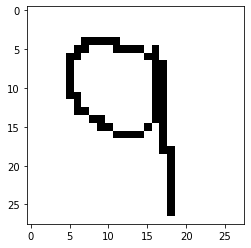

1/1 [==============================] - 0s 23ms/step
Digit Guess: 4


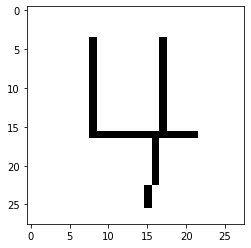

1/1 [==============================] - 0s 30ms/step
Digit Guess: 3


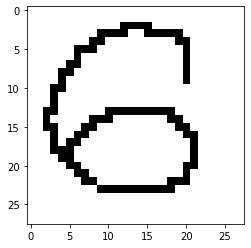

1/1 [==============================] - 0s 29ms/step
Digit Guess: 8


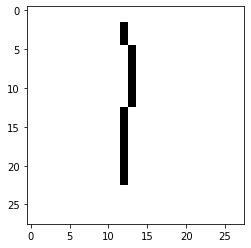

1/1 [==============================] - 0s 33ms/step
Digit Guess: 3


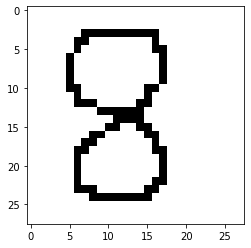

1/1 [==============================] - 0s 36ms/step
Digit Guess: 3


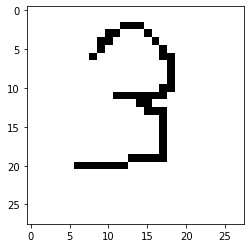

1/1 [==============================] - 0s 27ms/step
Digit Guess: 2


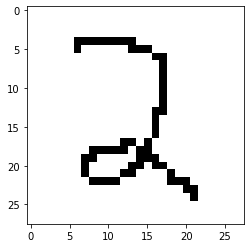

In [8]:
# Runs through 3 examples I created in Paint, and uses this model to predict what the number is
image_number = 1
while os.path.isfile(fr"C:\Users\16307\OneDrive\Documents\Digits\Digits{image_number}.png"):
    # imread() is a method from OpenCV library that decodes an image into a pixel array. [:,:,0] makes it grayscale
    img = cv2.imread(fr"C:\Users\16307\OneDrive\Documents\Digits\Digits{image_number}.png")[:,:,0]
    # preprocessed the image to match the format of the keras dataset
    img = np.invert(np.array([img]))
    prediction = model.predict(img)
    # The prediction array will be a list of 10 probabilities, the likeliehood that this image is that digit. Argmax selects the highest ones
    print(f"Digit Guess: {np.argmax(prediction)}")
    # Shows the image, in this case cmap specifies the color map as greyscale
    plt.imshow(img[0], cmap=plt.cm.binary)
    plt.show()
    image_number +=1

In [7]:
# During fit, with each new example the model makes a prediction, computes the loss by comparing it to the true label, 
# then updates the models weights using backpropagation
# Gradient descent updates the model weights my moving in the direction which minimizes the loss function